<a href="https://colab.research.google.com/github/AntoineGilsonGH/Probability-of-flipped-results/blob/main/Probabilities_of_flipping_accuracy_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability of flipping - Accuracy

We compute:
$$P(p_A \leq p_B | x)$$

where
- $p_A$ is the accuracy of the best-ranked method
- $p_B$ is the accuracy of the second best-ranked method

The probability is computed by sampling from the posterior
$$ p(p_1, p_2, p_3|x) \propto D\left(x_1 +1, x_2 +1, x_3 +1,  n- x_1 - x_2 - x_3 +1\right)$$

where
- $p_1=p_A-p_{11}$ is the proportion of cases for which only method $A$ is correct
- $p_2=p_B-p_{11}$ is the proportion of cases for which only method $B$ is correct
- $p_{11}$ is the assumed fraction of cases for which the two methods are correct (plays the same role as the correlation for the Dice). It needs to be assumed, based on the computations done by Patrick
- $x_1=np_1$ is the number of cases for which only method $A$ is correct
- $x_2=np_2$ is the number of cases for which only method $B$ is correct
- $x_3 = np_3$ is the number of cases for which the two methods are correct
- $n$ is the number of cases in the test set
- $D$ is the Dirichlet distribution



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

First constraint $ p_A + p_B - 1  \leq p_{11} \leq min(p_A,p_b)$


# Function to compute the probability of flipping

In [ ]:
# @title Default title text
def proba_of_flipping(n, pA, pB, p11, num_sampling):
    """
    Estimates the probability of flipping, i.e. the probability that method A was in fact better than method B.
    This is done by sampling from a Dirichlet distribution based on provided parameters.

    Args:
    n (int): Number of samples in the test set n.
    pA (float): Accuracy of method A.
    pB (float): Accuracy of method B.
    p11 (float): The assumed fraction of cases for which the two methods are correct (plays the same role as the correlation for the Dice).
    num_sampling (int): Number of samples to generate from the Dirichlet distribution.

    Returns:
    float: Probability of flipping
    """

    if p11 < pA + pB - 1:
        raise ValueError(f"p11 must be >= pA + pB - 1. Provided: p11 = {p11}, pA = {pA}, pB = {pB}")

    if p11 > min(pA,pB):
        raise ValueError(f"p11 must be <= min(pA,pB). Provided: p11 = {p11}, pA = {pA}, pB = {pB}")


    n11 = p11 * n

    x1 = n * pA - n11  # Occurrences of A but not B
    x2 = n * pB - n11  # Occurrences of B but not A

    # Compute parameters for the Dirichlet distribution
    alpha1 = x1 + 1
    alpha2 = x2 + 1
    alpha3 = n - x1 - x2 + 1

    # Define the number of samples to draw from the Dirichlet distribution
    num_samples = num_sampling

    # Draw samples from the Dirichlet distribution with parameters alpha1, alpha2, and alpha3
    samples = np.random.dirichlet([alpha1, alpha2, alpha3], num_samples)

    p1_samples = samples[:, 0]
    p2_samples = samples[:, 1]
    p3_samples = samples[:, 2]


    # Count how many times p1<p2 which is the same as pA<pB
    count_p1_less_than_p2 = np.sum(p1_samples < p2_samples)

    return count_p1_less_than_p2 / num_samples

# Applying the function

In [ ]:
proba_of_flipping(100,0.9,0.89,0.8,10000) #p11 = pA+pB-1

0.4085

# New version of probability of flipping

In [ ]:
# @title Default title text
def proba_of_flipping_2(n, pA, pB, p11, num_sampling):
    """
    Estimates the probability of flipping, i.e. the probability that method A was in fact better than method B.
    This is done by sampling from a Dirichlet distribution based on provided parameters.

    Args:
    n (int): Number of samples in the test set n.
    pA (float): Accuracy of method A.
    pB (float): Accuracy of method B.
    p11 (float): The assumed fraction of cases for which the two methods are correct (plays the same role as the correlation for the Dice).
    num_sampling (int): Number of samples to generate from the Dirichlet distribution.

    Returns:
    float: Probability of flipping
    """

    if p11 < pA + pB - 1:
        raise ValueError(f"p11 must be >= pA + pB - 1. Provided: p11 = {p11}, pA = {pA}, pB = {pB}")

    if p11 > min(pA,pB):
        raise ValueError(f"p11 must be <= min(pA,pB). Provided: p11 = {p11}, pA = {pA}, pB = {pB}")


    n11 = p11 * n

    x1 = n * pA - n11  # Occurrences of A but not B
    x2 = n * pB - n11  # Occurrences of B but not A

    # Compute parameters for the Dirichlet distribution
    alpha1 = x1 + 1
    alpha2 = x2 + 1
    alpha3 = n - x1 - x2 + 2

    # Define the number of samples to draw from the Dirichlet distribution
    num_samples = num_sampling

    # Draw samples from the Dirichlet distribution with parameters alpha1, alpha2, and alpha3
    samples = np.random.dirichlet([alpha1, alpha2, alpha3], num_samples)

    p1_samples = samples[:, 0]
    p2_samples = samples[:, 1]
    p3_samples = samples[:, 2]

    # Count how many times p1<p2 which is the same as pA<pB
    count_p1_less_than_p2 = np.sum(p1_samples < p2_samples)

    return count_p1_less_than_p2 / num_samples

In [ ]:
proba_of_flipping_2(100,0.9,0.89,0.8,10000)

0.4047

In [ ]:
def compare_two_versions(n, size, num_samples):

   log_uniform_n = np.exp(np.random.uniform(np.log(20), np.log(50000), size=n))
   pA_linspace = np.linspace(0.7,1,size)
   diff_linspace = np.linspace(0.01, 0.05, size)

   proba_flip_all = []
   proba_flip_2_all = []

   for n in log_uniform_n:

      for pA in pA_linspace:
         for diff in diff_linspace:

          pB = pA - diff

          p11_values = np.linspace(pA+pB-1 , min(pA,pB) - 0.001, size)
          try:
            proba_flip_all.append([proba_of_flipping(n, pA, pB, p11, num_samples) for p11 in p11_values])
            proba_flip_2_all.append([proba_of_flipping_2(n, pA, pB, p11, num_samples) for p11 in p11_values])
          except ValueError as e:
            continue

   proba_flip = np.array(proba_flip_all).flatten()
   proba_flip_2 = np.array(proba_flip_2_all).flatten()

   indices_tries = np.argsort(proba_flip)
   proba_flip_sorted = proba_flip[indices_tries]
   proba_flip_2_sorted = proba_flip_2[indices_tries]


   plt.figure(figsize=(8, 6))
   plt.plot(proba_flip, proba_flip, label ='y=x, proba of flipping with 3 parameters')
   plt.scatter(proba_flip_sorted, proba_flip_2_sorted, label='proba of flipping with 4 parameters', color = 'r', s=2)
   plt.xlabel('3 parameters model')
   plt.ylabel('4 parameters model')
   plt.title('3 parameters Dirichlet (blue) vs 4 parameters (red)')
   plt.legend()
   plt.grid(True, alpha = 0.5)
   plt.show()

compare_two_versions(100, 10, 100000)

KeyboardInterrupt: 

# Display how the probability of flipping varies as a function of ($p_A-p_B$) (and for varying $p_A$

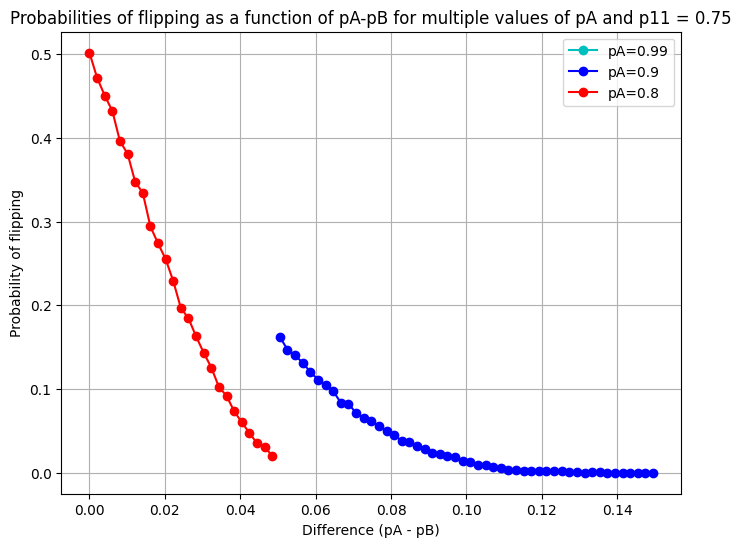

In [ ]:
n = 100
num_sampling = 10000
maxdiff=0.2
p11=0.75 # changer

diff=[]
for d in np.linspace(maxdiff,0, 100):
    diff.append(d)

pA=0.99
counts099 = []
#diff=[]
for pB in np.linspace(pA-maxdiff, pA, 100):
  try:
    counts099.append(proba_of_flipping(n,pA,pB,p11,num_sampling))
  except ValueError as e:
    counts099.append(None)


pA = 0.9
counts09 = []
#diff=[]
for pB in np.linspace(pA-maxdiff, pA, 100):
  try:
    counts09.append(proba_of_flipping(n,pA,pB,p11,num_sampling))
  except ValueError as e:
    counts09.append(None)

pA=0.8
counts08 = []
#diff=[]
for pB in np.linspace(pA-maxdiff, pA, 100):
  try:
    counts08.append(proba_of_flipping(n,pA,pB,p11,num_sampling))
  except ValueError as e:
    counts08.append(None)

# pA=0.7
# counts07 = []
# #diff=[]
# for pB in np.linspace(pA-maxdiff, pA, 100):
# #    diff.append(pA-pB )
#     counts07.append(proba_of_flipping(n,pA,pB,p11,num_sampling))


plt.figure(figsize=(8, 6))
plt.plot(diff, counts099, marker='o', linestyle='-', color='c', label='pA=0.99')
plt.plot(diff, counts09, marker='o', linestyle='-', color='b', label='pA=0.9')
plt.plot(diff, counts08, marker='o', linestyle='-', color='r', label='pA=0.8')
# plt.plot(diff, counts07, marker='o', linestyle='-', color='r', label='pA=0.7')
plt.xlabel('Difference (pA - pB)')
plt.ylabel('Probability of flipping')
plt.title(f'Probabilities of flipping as a function of pA-pB for multiple values of pA and p11 = {p11}')
plt.legend()
plt.grid(True)
plt.show()

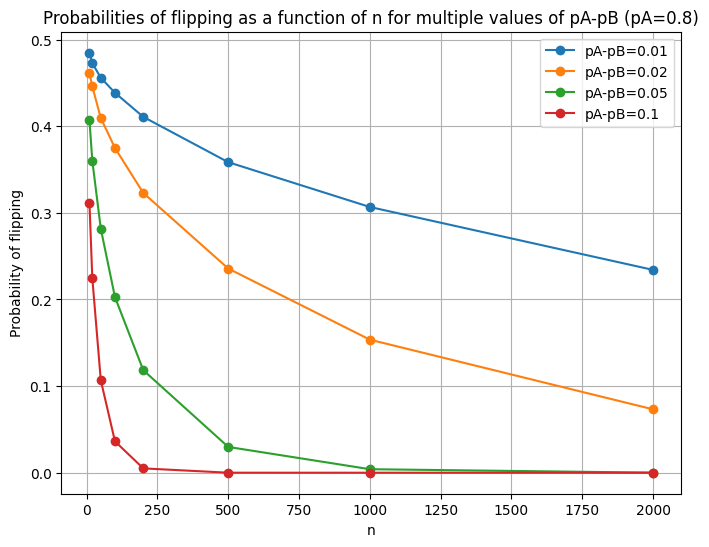

In [ ]:
num_sampling = 100000
pA=0.8
p11 = 0.6 # changer

pf = []
diffs = []

plt.figure(figsize=(8, 6))

for diff in [0.01, 0.02, 0.05, 0.1]:
  pf=[]
  n_test=[]
  diffs.append(diff)
  for n in [10, 20, 50, 100, 200, 500, 1000, 2000]:
    n_test.append(n)
    pB=pA-diff
    try:
      pf.append(proba_of_flipping(n,pA,pB,p11,num_sampling))
    except ValueError as e:
      pf.append(None)
  plt.plot(n_test, pf, marker='o', linestyle='-', label=f'pA-pB={diff}')


plt.xlabel('n')
plt.ylabel('Probability of flipping')
plt.title(f'Probabilities of flipping as a function of n for multiple values of pA-pB (pA={pA})')
plt.legend()
plt.grid(True)
plt.show()



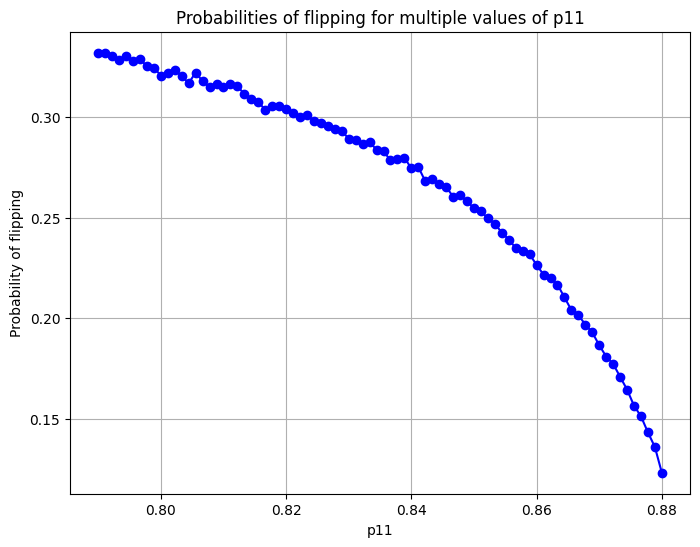

In [ ]:
n = 100
num_sampling = 100000
pA=0.9
pB=0.88

counts = []
diff=[]

for p11 in np.linspace(0.79, 0.9, 100):
  try:
    counts.append(proba_of_flipping(n,pA,pB,p11,num_sampling))
    diff.append(p11)
  except ValueError as e:
    counts.append(None)
    diff.append(None)

plt.figure(figsize=(8, 6))
plt.plot(diff, counts, marker='o', linestyle='-', color='b')
plt.xlabel('p11')
plt.ylabel('Probability of flipping')
plt.title('Probabilities of flipping for multiple values of p11')
plt.grid(True)
plt.show() #plusieurs

# McNemar frequentist test

The McNemar test, is a statistical test used to determine if there are significant differences between two related samples.

The test compares paired proportions from the same population under two different conditions.
A correction, called Yates' continuity correction, can be applied to adjust for small sample sizes.

In our problem, the statistic can be written as follows :

$$
\chi^2 = \frac{(|x_1 - x_2| - 1)^2}{x_1 + x_2}
$$

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

def test_mcnemar(n,pA,pB,p11):

  """
  frequentist test to determine if it is reasonable to assume that the two classifiers have the same performance.
  The null hypothesis is : The two classifiers perform the same
  If the p_value is < 0.05, we reject the similarity of performance

    Args:
    n : number of samples of the test set
    pA : accuracy of classifier A
    pB : accuracy of classifier B
    p11 : proportion of the sample where they both succeded

  Returns:
  statistic of the test
  pvalue of the test
  """
  if p11 < pA + pB - 1:
        print("Minimum p11 possible:", pA + pB - 1 )
        raise ValueError(f"p11 must be >= pA + pB - 1. Provided: p11 = {p11}, pA = {pA}, pB = {pB}")


  elif p11 > min(pA,pB):
        print("Maximum p11 possible:", min(pA,pB))
        raise ValueError(f"p11 must be <= min(pA, pB). Provided: p11 = {p11}, pA = {pA}, pB = {pB}")

  n11 = p11 * n
  x1 = n * pA - n11  # Occurrences of A but not B
  x2 = n * pB - n11
  n00 = n - (x1+x2+n11)

  table = np.array([[n00, x1],
                  [x2, n11]])
  print(f'The following contingency table corresponds to pA = {pA}, pB = {pB}, p11 = {p11}:\n{table}')

  result = mcnemar(table, exact=False, correction=True)

  print(f'Statistique de test: {result.statistic}')
  print(f'p-value: {(result.pvalue)/2}')

  return result.statistic, (result.pvalue)/2

test_mcnemar(100, 0.9,0.89,0.79)

The following contingency table corresponds to pA = 0.9, pB = 0.89, p11 = 0.79:
[[ 0. 11.]
 [10. 79.]]
Statistique de test: 0.0
p-value: 0.5


(0.0, 0.5)

<ipython-input-147-4f29c2b73b06>:10: RuntimeWarning: divide by zero encountered in divide
  mcnemar_stat_cor = (np.abs(n*p1 - n*p2) - 1) ** 2 / (n*p1 + n*p2)


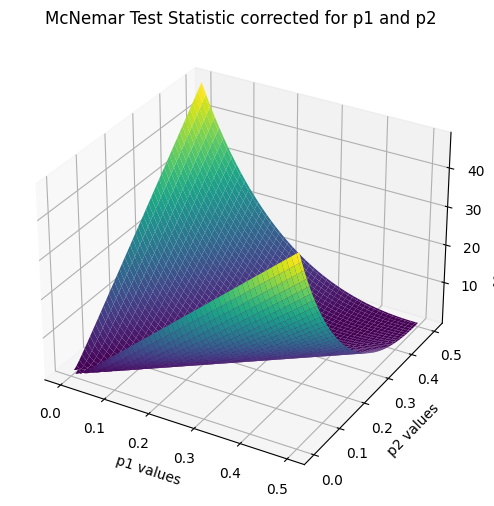

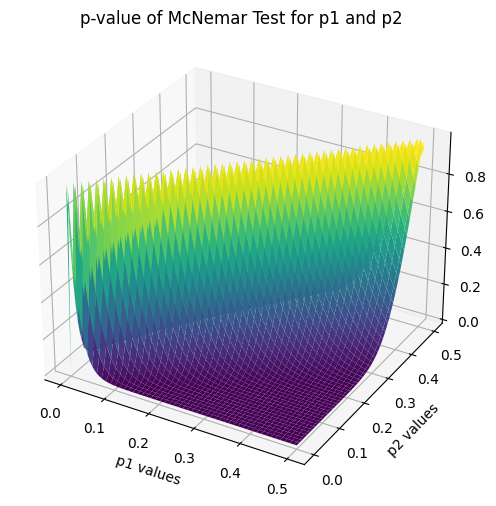

In [ ]:
from scipy.stats import chi2

def plot_mcnemar_3D():

    n=100
    p1_vals = np.linspace(0, 0.5, 100)
    p2_vals = np.linspace(0, 0.5, 100)
    p1, p2 = np.meshgrid(p1_vals, p2_vals)

    mcnemar_stat_cor = (np.abs(n*p1 - n*p2) - 1) ** 2 / (n*p1 + n*p2)

    mcnemar_pvalue = chi2.sf(mcnemar_stat_cor, df=1)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(p1, p2, mcnemar_stat_cor, cmap='viridis')
    ax.set_xlabel('p1 values')
    ax.set_ylabel('p2 values')
    ax.set_zlabel('McNemar Statistic')
    ax.set_title('McNemar Test Statistic corrected for p1 and p2')

    plt.show()

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(p1, p2, mcnemar_pvalue, cmap='viridis')
    ax.set_xlabel('p1 values')
    ax.set_ylabel('p2 values')
    ax.set_zlabel('p-value')
    ax.set_title('p-value of McNemar Test for p1 and p2')

    plt.show()

plot_mcnemar_3D()

In [ ]:
def test_mcnemar_fast(n,pA,pB,p11):

  if p11 < pA + pB - 1:
        print("Minimum p11 possible:", pA + pB - 1 )
        raise ValueError(f"p11 must be >= pA + pB - 1. Provided: p11 = {p11}, pA = {pA}, pB = {pB}")


  elif p11 > min(pA,pB):
        print("Maximum p11 possible:", min(pA,pB))
        raise ValueError(f"p11 must be <= min(pA, pB). Provided: p11 = {p11}, pA = {pA}, pB = {pB}")

  n11 = p11 * n
  x1 = n * pA - n11  # Occurrences of A but not B
  x2 = n * pB - n11
  n00 = n - (x1+x2+n11)

  table = np.array([[n00, x1],
                  [x2, n11]])

  result = mcnemar(table, exact=False, correction=True)

  return result.statistic, (result.pvalue)/2

test_mcnemar_fast(100, 0.9,0.89,0.79)

(0.0, 0.5)

In [ ]:
num_sampling = 10000

def plot_pvalue_varying_p11(n, pA, pB, p11_values):

    """
    Plots the evolution of the p-value as a function of p11 (for example) for the McNemar test.

    Args:
    n : number of samples of the test set
    pB : accuracy of classifier A
    pB : accuracy of classifier B
    p11_values : list of proportion of the sample where both classifiers succeeded
    """
    t_stat = []
    p_values = []
    proba_flip = []

    for p11 in p11_values:
      if p11 < pA + pB - 1:
        print("Minimum p11 possible:", pA + pB - 1 )
        raise ValueError(f"p11 must be >= pA + pB - 1. Provided: p11 = {p11}, pA = {pA}, pB = {pB}")


      elif p11 > min(pA,pB):
        print("Maximum p11 possible:", min(pA,pB))
        raise ValueError(f"p11 must be <= min(pA, pB). Provided: p11 = {p11}, pA = {pA}, pB = {pB}")

      else:
        try:
            stat, pval = test_mcnemar_fast(n, pA, pB, p11)
            prob = proba_of_flipping_2(n, pA, pB, p11, num_sampling)
            t_stat.append(stat)
            p_values.append(pval/2) # unilateral
            proba_flip.append(prob)
        except ValueError as e:
            print(f"Error for p11={p11}: {e}")
            p_values.append(None)  # Handle cases where the p-value cannot be computed

    plt.figure(figsize=(8, 6))
    plt.plot(p11_values, p_values, marker='o', linestyle='-', color='b')
    plt.xlabel('p11')
    plt.ylabel('p-value (McNemar Test)')
    plt.title('Evolution of p-value as a function of p11')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(p11_values, proba_flip, marker='o', linestyle='-', color='b')
    plt.xlabel('p11')
    plt.ylabel('proba of flipping')
    plt.title('Evolution of proba flip as a function of p11')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(p11_values, t_stat, marker='o', linestyle='-', color='r')
    plt.xlabel('p11')
    plt.ylabel('Test statistic (McNemar Test)')
    plt.title('Evolution of test statistic as a function of p11')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(p_values, proba_flip, marker='o', linestyle='-', color='g')
    plt.xlabel('p_values')
    plt.ylabel('proba of flipping')
    plt.title('Link between p_values and proba of flip for p11 fixed')
    plt.grid(True)
    plt.show()

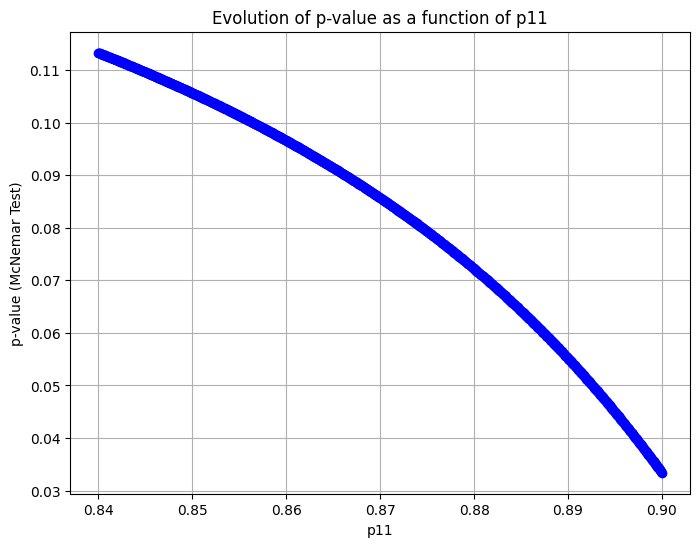

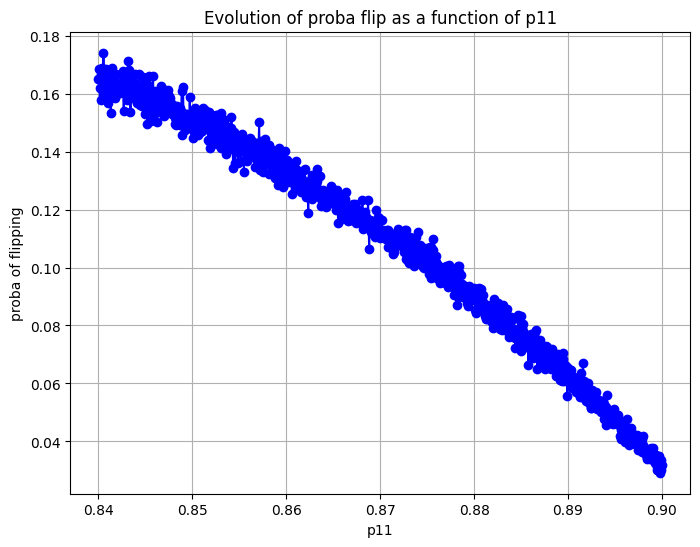

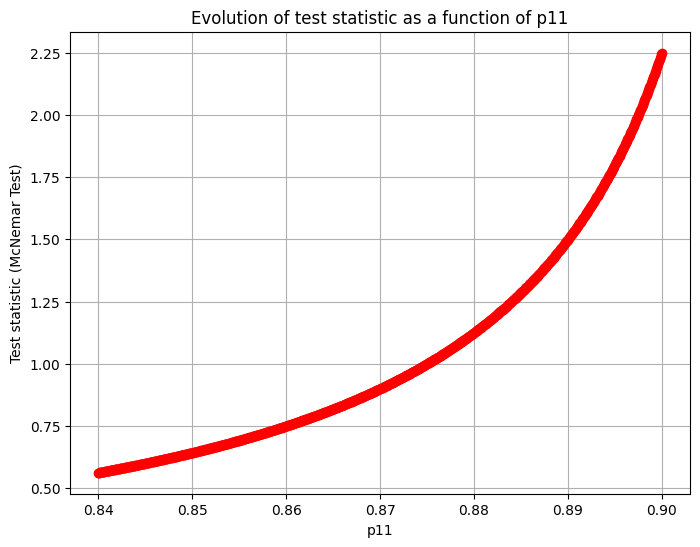

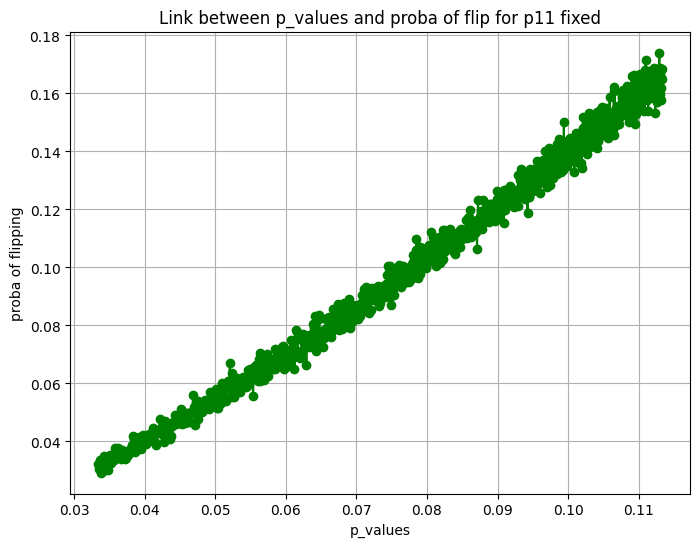

In [ ]:
plot_pvalue_varying_p11(100, 0.94, 0.9, np.linspace(0.84,0.9,1000))

These graphs are coherent and support previous graphics : indeed, when $p_{11}$ increases, that means that the more accurate classifier is just a better version of the less accurate one, that predicts exactly the same values, but  on a bigger sample of the test set. Thus, the hypothesis of the equality of performance of both classifiers can be rejected, because the classifier A is clearly better than the B. Rejecting the null hypothesis of equal performance is equivalent of reducing the probability of flipping, because it means the two classifiers aren't that close in term of performance.

In [ ]:
def plot_pvalue_varying_diff_pA(n, pA_list, diff_values, p11):
    """
    Plots the evolution of the p-value and test statistic as a function of (pA - pB)
    for multiple pA values for the McNemar test, while keeping p11 fixed.

    Args:
    n : number of samples of the test set
    pA_list : list of pA values (accuracies of classifier A)
    diff_values : list or array of differences between pA and pB (pA - pB)
    p11 : proportion of the sample where both classifiers succeeded

    """

    if isinstance(pA_list, (float, int)):
        pA_list = [pA_list]

    colors = plt.cm.viridis(np.linspace(0, 1, len(pA_list)))

    all_p_values = {}
    all_t_stats = {}
    all_proba_flip = {}

    for pA in pA_list:

        t_stat = []
        p_values = []
        proba_flip = []

        for diff in diff_values:
            pB = pA - diff

            try:
                stat, pval = test_mcnemar_fast(n, pA, pB, p11)
                prob = proba_of_flipping(n, pA, pB, p11, num_sampling)
                t_stat.append(stat)
                p_values.append(pval/2) # unilateral test
                proba_flip.append(prob)
            except ValueError as e:
                print(f"Error for pA = {pA}, pB = {pB}, p11 = {p11}, diff={diff}: {e}")
                t_stat.append(None)
                p_values.append(None)

        all_p_values[pA] = p_values
        all_t_stats[pA] = t_stat
        all_proba_flip[pA] = proba_flip

    plt.figure(figsize=(8, 6))
    for i, pA in enumerate(pA_list):
        plt.plot(diff_values, all_p_values[pA], marker='o', linestyle='-', color=colors[i], label=f'pA={pA}')

    plt.xlabel('pA - pB')
    plt.ylabel('p-value (McNemar Test)')
    plt.title('Evolution of p-value as a function of (pA - pB) for multiple pA values')
    plt.legend(title='pA values')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    for i, pA in enumerate(pA_list):
        plt.plot(diff_values, all_t_stats[pA], marker='o', linestyle='-', color=colors[i], label=f'pA={pA}')

    plt.xlabel('pA - pB')
    plt.ylabel('Test statistic (McNemar Test)')
    plt.title('Evolution of test statistic as a function of (pA - pB) for multiple pA values')
    plt.legend(title='pA values')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    for i, pA in enumerate(pA_list):
        plt.plot(diff_values, all_proba_flip[pA], marker='o', linestyle='-', color=colors[i], label=f'pA={pA}')

    plt.xlabel('pA - pB')
    plt.ylabel('Proba of flipping')
    plt.title('Evolution of proba of flipping as a function of (pA - pB) for multiple pA values')
    plt.legend(title='pA values')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    for i, pA in enumerate(pA_list):
        plt.plot(all_p_values[pA], all_proba_flip[pA], marker='o', linestyle='-', color=colors[i], label=f'pA={pA}')

    plt.xlabel('p_values')
    plt.ylabel('Proba of flipping')
    plt.title('Evolution of proba of flipping as a function of pvalues for multiple pA values')
    plt.legend(title='pA values')
    plt.grid(True)
    plt.show()


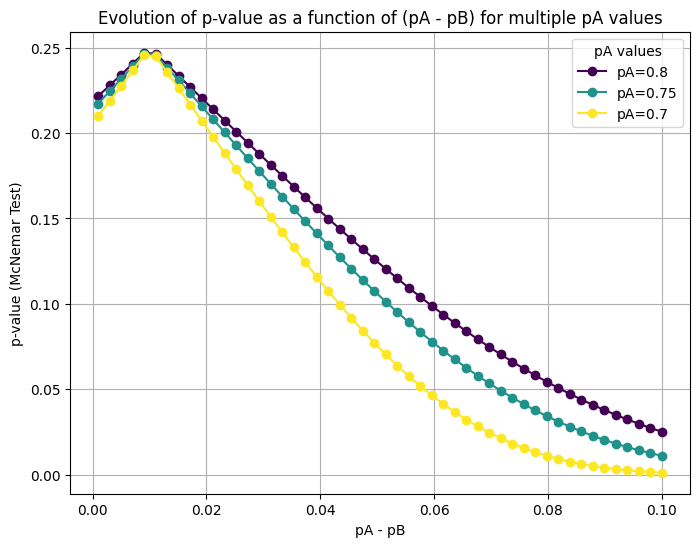

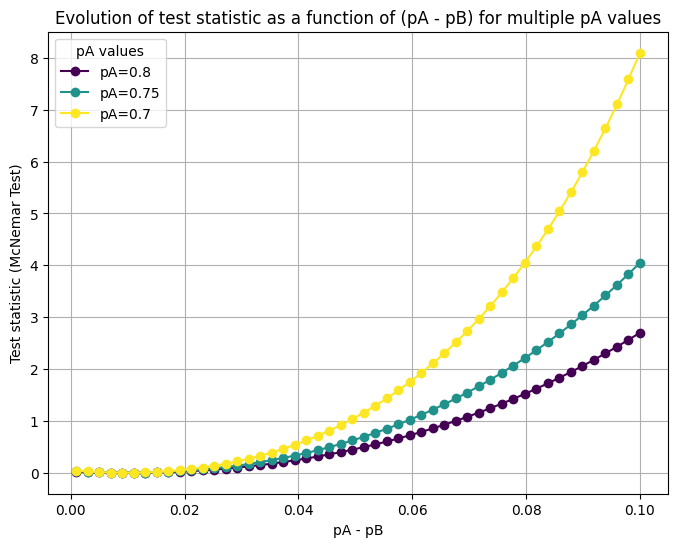

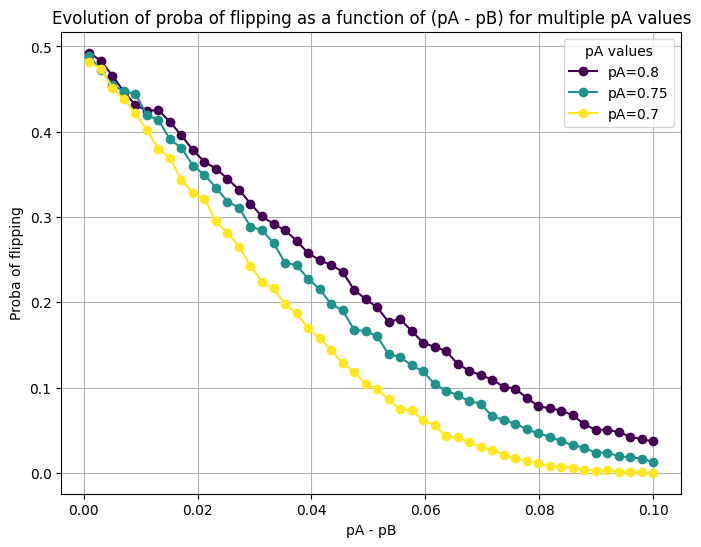

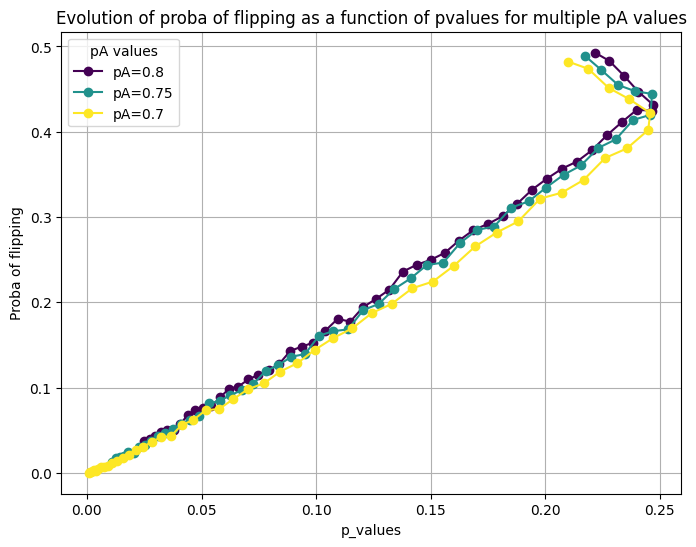

In [ ]:
plot_pvalue_varying_diff_pA(100, [0.8,0.75,0.7], np.linspace(0.001,0.10), 0.6)

We can see two interesting points that corrobate the previous bayesian graphics.

- On the one hand, when $(p_A - p_B)$ increases, the p value decreases. This is coherent because when the difference between $p_A$ and $p_B$ increases, the null hypothesis of equal performances between A and B becomes less reasonable, and thus is rejected. (The null hypothesis is rejected when p < α) And, in our case, a diminution of p value is equivalent to a diminution of the probability of flipping. (because that means that the performances of our two classifiers aren't close enough to flip)

- On the other hand, when $(p_A -p_B)$ is fixed, the p value is proportional to $p_A$, and thus, the probability of flipping is proportional to $p_A$.
This was shown by the bayesian part, when we saw that the probability of flipping was higher for instance for $p_A = 0.9$ than $p_A = 0.8$

graph 3d mcnemar stat

# We now consider $p_1-p_2$ instead of $p_A-p_B$ (so we don't have to input a value for $p_{11}$ even if it implied)

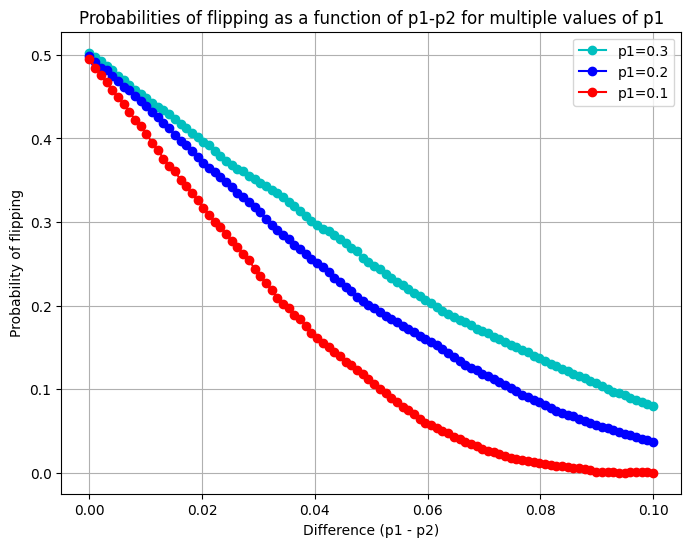

In [ ]:
n = 100
num_sampling = 10000
maxdiff=0.1


diff=[]
for d in np.linspace(maxdiff,0, 100):
    diff.append(d)

p1 = 0.3
counts099 = []

for p2 in np.linspace(p1-maxdiff, p1, 100):
  try:
    counts099.append(proba_of_flipping_p1_p2(n,p1, p2,num_sampling))
  except ValueError as e:
    counts099.append(None)


p1 = 0.2
counts09 = []

for p2 in np.linspace(p1-maxdiff, p1, 100):
  try:
    counts09.append(proba_of_flipping_p1_p2(n,p1,p2,num_sampling))
  except ValueError as e:
    counts09.append(None)

p1 =0.1
counts08 = []

for p2 in np.linspace(p1-maxdiff, p1, 100):
  try:
    counts08.append(proba_of_flipping_p1_p2(n,p1,p2,num_sampling))
  except ValueError as e:
    counts08.append(None)



plt.figure(figsize=(8, 6))
plt.plot(diff, counts099, marker='o', linestyle='-', color='c', label='p1=0.3')
plt.plot(diff, counts09, marker='o', linestyle='-', color='b', label='p1=0.2')
plt.plot(diff, counts08, marker='o', linestyle='-', color='r', label='p1=0.1')
plt.xlabel('Difference (p1 - p2)')
plt.ylabel('Probability of flipping')
plt.title(f'Probabilities of flipping as a function of p1-p2 for multiple values of p1')
plt.legend()
plt.grid(True)
plt.show()

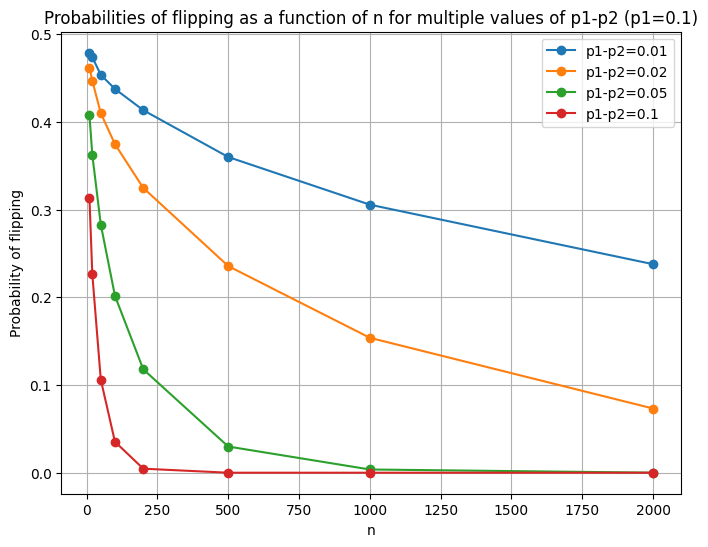

In [ ]:
num_sampling = 100000
p1 = 0.2

pf = []
diffs = []

plt.figure(figsize=(8, 6))

for diff in [0.01, 0.02, 0.05, 0.1]:
  pf=[]
  n_test=[]
  diffs.append(diff)
  for n in [10, 20, 50, 100, 200, 500, 1000, 2000]:
    n_test.append(n)
    p2=p1-diff
    pf.append(proba_of_flipping_p1_p2(n,p1,p2,num_sampling))
  plt.plot(n_test, pf, marker='o', linestyle='-', label=f'p1-p2={diff}')


plt.xlabel('n')
plt.ylabel('Probability of flipping')
plt.title('Probabilities of flipping as a function of n for multiple values of p1-p2 (p1=0.1)')
plt.legend()
plt.grid(True)
plt.show()



# We consider now the problem as a function of $p_A$ + $p_B$ / 2

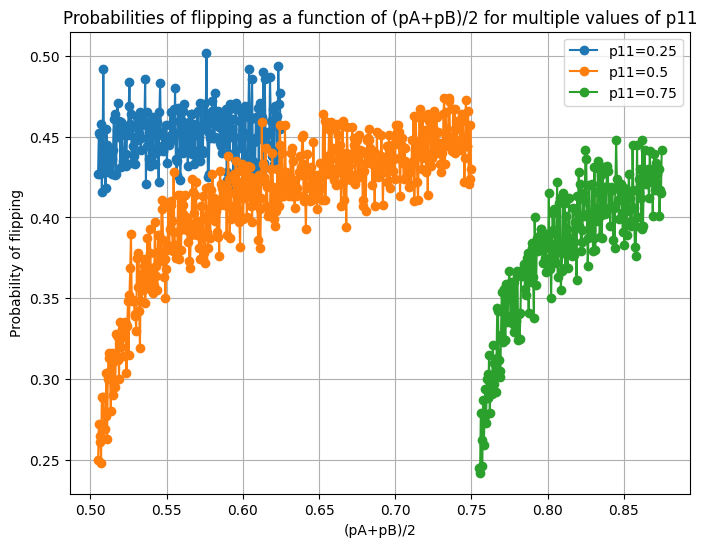

In [ ]:
def plot_flip_average_p11(n, pA_range, pB_range, p11_values):

    all_proba = []
    average = []
    plt.figure(figsize=(8, 6))

    for p11 in p11_values:

       avg_values = []
       flip_probabilities = []

       for pA, pB in zip(pA_range, pB_range):

           avg_val = (pA + pB) / 2
           try:
              flip_proba = proba_of_flipping(n, pA, pB, p11, 1000)
              avg_values.append(avg_val)
              flip_probabilities.append(flip_proba)
           except ValueError as e:
              avg_values.append(None)
              flip_probabilities.append(None)

       plt.plot(avg_values, flip_probabilities, marker='o', linestyle='-', label=f'p11={p11}')


    plt.xlabel('(pA+pB)/2')
    plt.ylabel('Probability of flipping')
    plt.title(f'Probabilities of flipping as a function of (pA+pB)/2 for multiple values of p11')
    plt.legend()
    plt.grid(True)
    plt.show()

n = 100
pA_range = np.linspace(0.51, 1, 1000)
pB_range = np.linspace(0.5, 0.99, 1000)
p11_range = [0.25,0.5,0.75]

plot_flip_average_p11(n,pA_range, pB_range, p11_range)

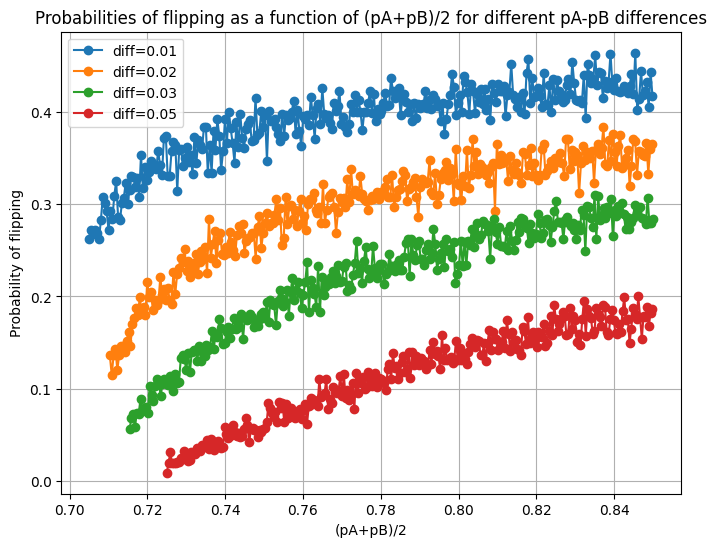

In [ ]:
def plot_flip_average_diff(n, p11, diff_values, pA_start, pA_end, num_points=1000):

    plt.figure(figsize=(8, 6))

    for diff in diff_values:

        pA_range = np.linspace(pA_start + diff, pA_end, num_points)
        pB_range = np.linspace(pA_start, pA_end - diff, num_points)

        avg_values = []
        flip_probabilities = []

        for pA, pB in zip(pA_range, pB_range):

           avg_val = (pA + pB) / 2
           try:
              flip_proba = proba_of_flipping(n, pA, pB, p11, 1000)
              avg_values.append(avg_val)
              flip_probabilities.append(flip_proba)
           except ValueError as e:
              avg_values.append(None)
              flip_probabilities.append(None)

        plt.plot(avg_values, flip_probabilities, marker='o', linestyle='-', label=f'diff={diff}')

    plt.xlabel('(pA+pB)/2')
    plt.ylabel('Probability of flipping')
    plt.title(f'Probabilities of flipping as a function of (pA+pB)/2 for different pA-pB differences')
    plt.legend()
    plt.grid(True)
    plt.show()


n = 100
diff_values = [0.01, 0.02, 0.03, 0.05]  # Differences between mA et mB
pA_start = 0.5
pA_end = 1
p11 = 0.7

plot_flip_average_diff(n, p11, diff_values, pA_start, pA_end)